In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


In [113]:
def plot_confusion_matrix(y,y_predict):
    'this function plots the confusion matrix'

    cm = confusion_matrix(y,y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);
    ax.set_xlabel('Predictied labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    
    plt.show()

In [114]:
df = pd.read_csv('/Users/hashimkhan/Data Science Capstone/datasets/dataset_part_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [115]:
X = pd.read_csv('/Users/hashimkhan/Data Science Capstone/datasets/dataset_part_3.csv')
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [116]:
Y = df['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [117]:
#creates an object to transform data to have 0 mean and unit variance
transform = preprocessing.StandardScaler()

#calculates mean and std deviation
transform.fit(X)

#standardizes data using calculation
X = transform.transform(X)

In [151]:
# creates subsets of the data to train model 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [119]:
parameters = {'C': [0.1,0.1,1], #regulation strength
              'penalty':['l2'], #ridge regression
             'solver':['lbfgs']} #algo for regression

In [120]:
logreg = LogisticRegression() #creating instance of logistic regression
logreg_cv = GridSearchCV(logreg, parameters, cv=10) #creating a GridSearch object

In [121]:
logreg_cv.fit(X_train,Y_train) #trains the GridSearchCV to find best paramaters 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [122]:
print('best parameters:', logreg_cv.best_params_)
print('accuracy:', logreg_cv.best_score_)


best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy: 0.8214285714285714


In [123]:
#accuracy of test data
logreg_cv.score(X_test, Y_test)

0.8333333333333334

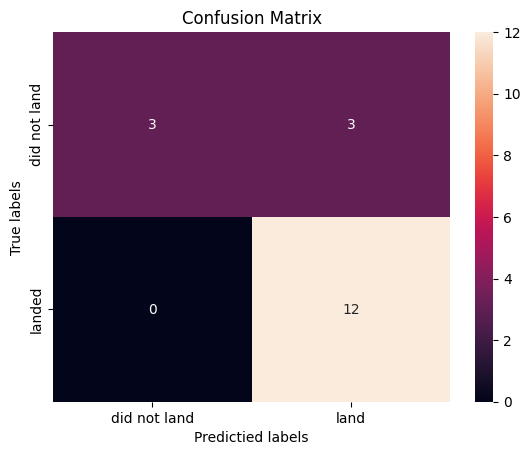

In [124]:
#predicting the target variable 'y' values
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [125]:
parameters = {'kernel': ('linear', 'rbf', 'poly', 'rbf','sigmoid'),
              'C': np.logspace(-3,3,5),
              'gamma': np.logspace(-3,3,5)

}
svm = SVC()
svm_cv=GridSearchCV(svm, parameters, cv=10)

In [126]:
svm_cv.fit(X_train, Y_train)
print('best parameters:', svm_cv.best_params_)
print('accuracy:', svm_cv.best_score_)

best parameters: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy: 0.8482142857142856


In [127]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

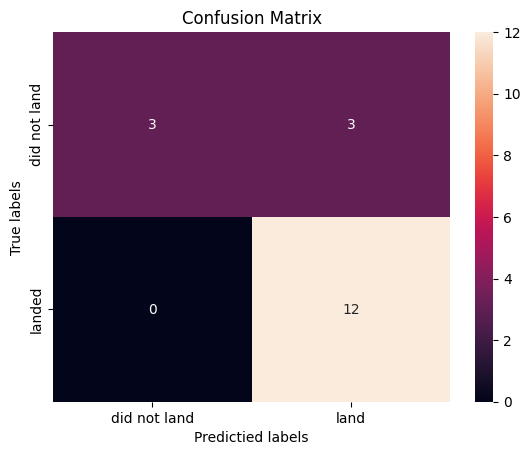

In [128]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [132]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range (1,10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [2,5,10]
}
tree = DecisionTreeClassifier()

In [133]:
tree_cv = GridSearchCV(tree, parameters, cv=10)

In [134]:
tree_cv.fit(X_train, Y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-pac

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [135]:
print('best param:', tree_cv.best_params_)
print('accuracy:', tree_cv.best_score_)

best param: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy: 0.8642857142857142


In [136]:
tree_cv.score(X_test, Y_test)

0.7777777777777778

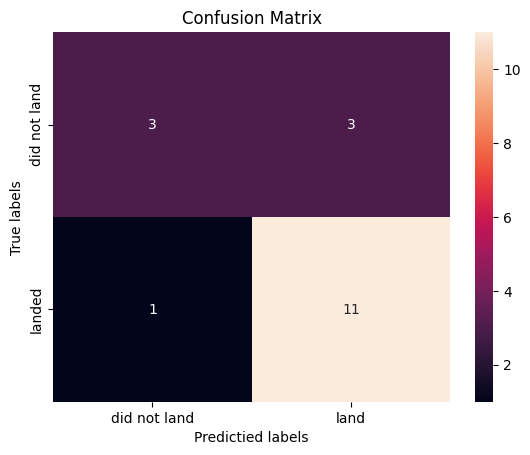

In [137]:
yhat=tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [140]:
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]

}
KNN= KNeighborsClassifier()

In [141]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)
print('best params:', knn_cv.best_params_)
print('accuracy:', knn_cv.best_score_)

best params: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy: 0.8482142857142858


In [142]:
knn_cv.score(X_test,Y_test)

0.8333333333333334

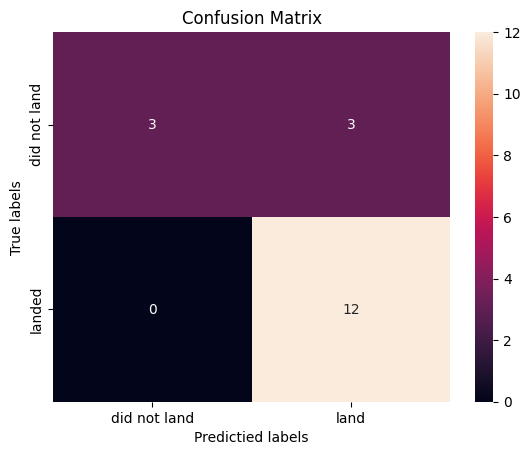

In [144]:
yhat=knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [154]:
print('best score for logistic regression:', logreg_cv.best_score_)
print('best score for SVM:', svm_cv.best_score_)
print('best score for decision tree:', tree_cv.best_score_)
print('best score for knn:', knn_cv.best_score_)

best score for logistic regression: 0.8214285714285714
best score for SVM: 0.8482142857142856
best score for decision tree: 0.8642857142857142
best score for knn: 0.8482142857142858


In [152]:
X_test.shape

(18, 83)

In [153]:
Y_test.shape

(18,)

In [162]:
y = [logreg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_]
x = ['logistic', 'SVM', 'Tree', 'KNN']
    

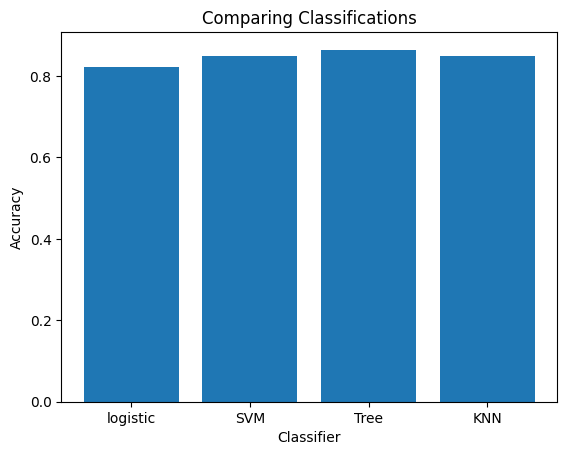

In [167]:
plt.bar(x,y)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparing Classifications')
plt.show()
